In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from sklearn import linear_model

In [3]:

# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix, returns


In [64]:
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']

stocks = [stock + '' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=3500)

meanReturns, covMatrix, returns = get_data(stocks, startDate, endDate)


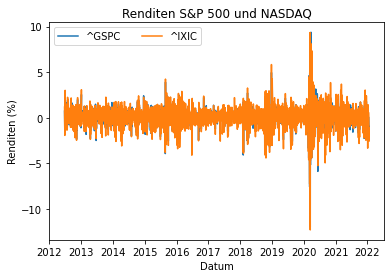

In [65]:

#plot returns
plt.plot(returns*100)
plt.ylabel('Renditen (%)')
plt.xlabel('Datum')
plt.title('TITEL')
plt.legend([i for i in stockList], ncol=3)
plt.show()


In [66]:

#regression
regr = linear_model.LinearRegression()

#Hier die Ticker einfügen
train_x = np.asanyarray(returns[[' ']])
train_y = np.asanyarray(returns[[' ']])

train_x = train_x[~(np.isnan(train_x))]
train_y = train_y[~(np.isnan(train_y))]

train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)
#fitting
regr.fit(train_x, train_y)



LinearRegression()

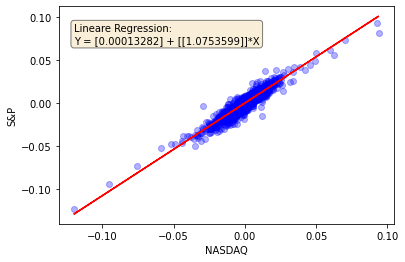

In [74]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.scatter(train_x, train_y,  color='blue', alpha=0.3)
#plt.plot(X, Formular for linear regression)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel(" X ")
plt.ylabel(" Y ")
plt.text(-0.12,0.07,'Lineare Regression: \nY = {} + {}*X'.format(regr.intercept_, regr.coef_),bbox=props)
plt.show()